# 🎨 3W Dataset Visualization Techniques

This notebook demonstrates advanced visualization techniques for the 3W oil well dataset using dimensionality reduction methods and statistical analysis.

**Key Features:**
- **complete vizualizzation**: vizualizar samples of each chosen class
- **t-SNE & UMAP**: Dimensionality reduction for pattern discovery with parameter optimization

**Prerequisites:**
- Run `1_data_treatment.ipynb` first to generate windowed time series data
- Ensure processed data is saved in pickle format for optimal performance

In [1]:
# Setup Environment and Imports
import time
import sys
import os

start_time = time.time()

print("🎨 Loading 3W Dataset for Visualization Analysis")
print("=" * 60)

# Add src to path and import modules
sys.path.append("src")

try:
    print("📦 Importing modules...", end=" ", flush=True)
    from src.data_persistence import DataPersistence
    from src.visualization import DataVisualizer, DimensionalityReductionVisualizer
    from src import config
    import pandas as pd
    import numpy as np

    print("✅")

    # Validate configuration
    print("⚙️ Validating configuration...", end=" ", flush=True)
    if hasattr(config, "validate_config"):
        warnings = config.validate_config()
        if warnings:
            print("⚠️")
            for warning in warnings:
                print(f"     • {warning}")
        else:
            print("✅")
    else:
        print("✅")

    print("🔧 Initializing components...", end=" ", flush=True)
    persistence = DataPersistence(base_dir=config.PROCESSED_DATA_DIR, verbose=False)
    visualizer = DataVisualizer()
    dim_reducer = DimensionalityReductionVisualizer()
    print("✅")

    print(f"📁 Configuration Summary:")
    print(f"   • Save format: {config.SAVE_FORMAT}")
    print(f"   • Data directory: {config.PROCESSED_DATA_DIR}")

except Exception as e:
    print(f"❌ Setup failed: {e}")
    raise

🎨 Loading 3W Dataset for Visualization Analysis
📦 Importing modules... ✅
⚙️ Validating configuration... ✅
🔧 Initializing components... ✅
📁 Configuration Summary:
   • Save format: pickle
   • Data directory: processed_data


## Visualization for Time Series

**Challenges with high-dimensional time series:**
- **Curse of dimensionality** - Hard to visualize >3D data
- **Pattern discovery** - Hidden structures in sensor data
- **Class separability** - Understanding which features distinguish faults

**Visualization benefits:**
- **Data understanding** - See actual sensor patterns per fault type
- **Algorithm selection** - Choose models based on data structure
- **Quality assessment** - Identify noise, outliers, mislabeled data
- **Feature engineering** - Discover which sensors are most informative

In [2]:
# Load Windowed Data
try:
    print("📊 Loading windowed test data...")
    load_start = time.time()

    # Load data from first available fold using the existing visualizer
    test_dfs, test_classes, metadata = dim_reducer.load_windowed_data(
        persistence, config
    )

    load_time = time.time() - load_start
    print(f"✅ Data loaded successfully!")
    print(f"   • Format: {metadata['format']}")
    print(f"   • Fold: {metadata['fold_number']}")
    print(f"   • Windows: {metadata['windows_count']}")
    print(f"   • Load time: {load_time:.3f}s")

    # Quick data validation
    if test_dfs and len(test_dfs) > 0:
        sample_window = test_dfs[0]
        sample_class = test_classes[0] if test_classes else "Unknown"

except Exception as e:
    print(f"❌ Data loading failed: {e}")
    print("💡 Troubleshooting:")
    print("   • Ensure '1_data_treatment.ipynb' completed successfully")
    print("   • Check if processed_data directory exists")

    test_dfs, test_classes = None, None
    import traceback

    traceback.print_exc()

📊 Loading windowed test data...
📊 Loading windowed data...
   • Windowed directory: processed_data\cv_splits\windowed
   • Loading from fold_1
   ✅ Loaded 4794 windows from fold 1
✅ Data loaded successfully!
   • Format: pickle
   • Fold: 1
   • Windows: 4794
   • Load time: 0.429s


## Data Loading for Visualization

**Key considerations:**
- **Memory management** - Time series windows can be large
- **Sampling strategy** - Balance between detail and performance
- **Data validation** - Ensure windowed data maintains temporal structure

**Loading priorities:**
- **Test data focus** - Analyze real data that models will encounter
- **Class balance** - Ensure all fault types represented
- **Metadata preservation** - Keep windowing and preprocessing information

## Complete Data Visualization

**Purpose:**
- **Temporal patterns** - See how sensors behave over time for each fault
- **Correlation analysis** - Understand relationships between pressure/temperature
- **Baseline establishment** - Compare normal vs abnormal behavior

**What to look for:**
- **Normal class (0)** - Stable, regular patterns
- **Fault classes (1-8)** - Distinctive anomalous behaviors
- **Sensor interactions** - How different sensors respond to same fault

🎨 Window Sensor Data Visualization
🏷️ Processing class labels...
🏷️ Original class distribution: {np.int16(0): np.int64(1142), np.int16(1): np.int64(2), np.int16(2): np.int64(3), np.int16(3): np.int64(242), np.int16(4): np.int64(136), np.int16(5): np.int64(1), np.int16(6): np.int64(7), np.int16(7): np.int64(7), np.int16(8): np.int64(23), np.int16(101): np.int64(52), np.int16(102): np.int64(20), np.int16(105): np.int64(58), np.int16(106): np.int64(3), np.int16(107): np.int64(2826), np.int16(108): np.int64(272)}
🔄 Mapped 3231 points with transient classes
🏷️ Mapped class distribution: {np.int64(0): np.int64(1142), np.int64(1): np.int64(54), np.int64(2): np.int64(23), np.int64(3): np.int64(242), np.int64(4): np.int64(136), np.int64(5): np.int64(59), np.int64(6): np.int64(10), np.int64(7): np.int64(2833), np.int64(8): np.int64(295)}
📊 Creating window Sensor Data Visualizations
📈 Visualizing 2 samples for each of 9 classes

🎯 Class 0:
   📊 Showing 2 samples (out of 1142 available)


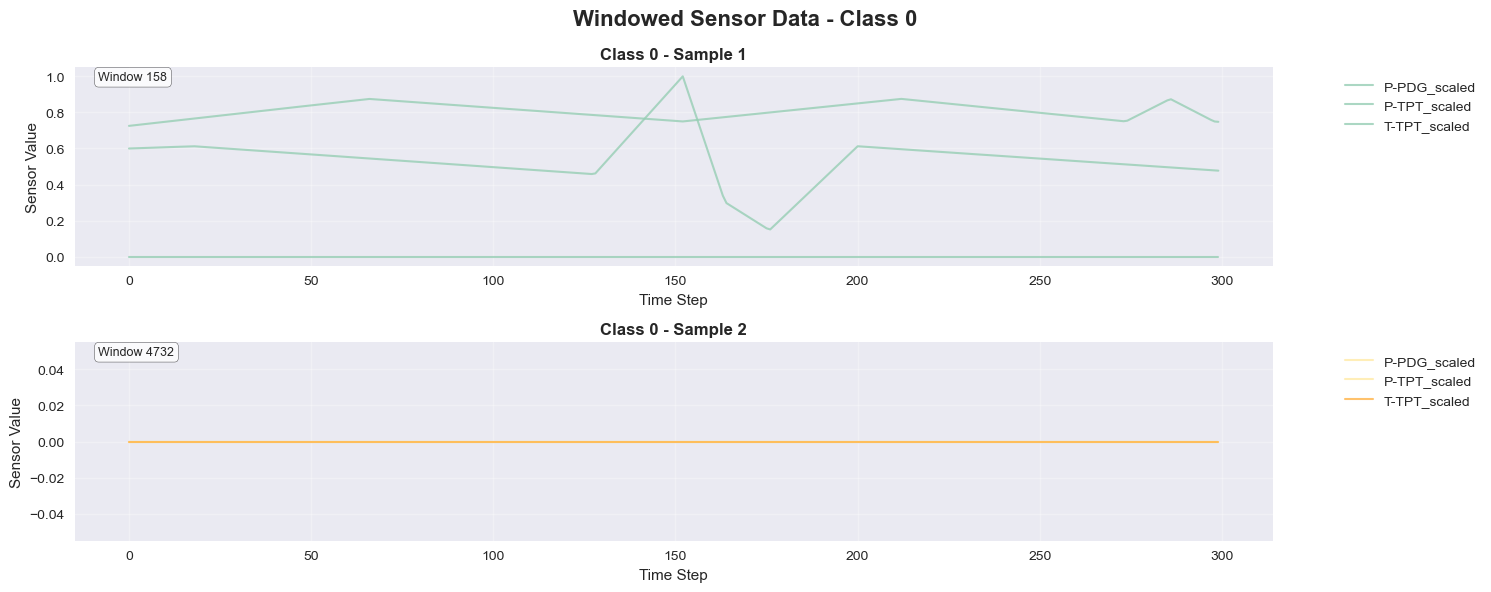

   ✅ Displayed 2 samples for class 0

🎯 Class 1:
   📊 Showing 2 samples (out of 54 available)


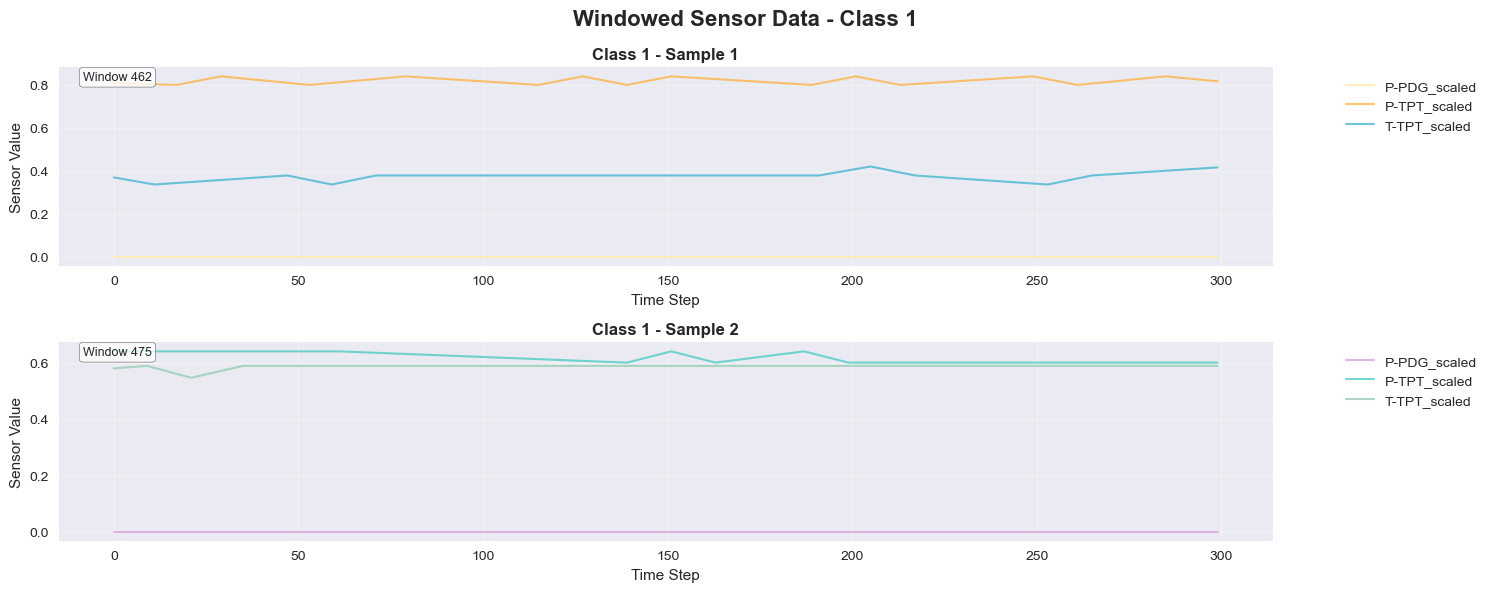

   ✅ Displayed 2 samples for class 1

🎯 Class 2:
   📊 Showing 2 samples (out of 23 available)


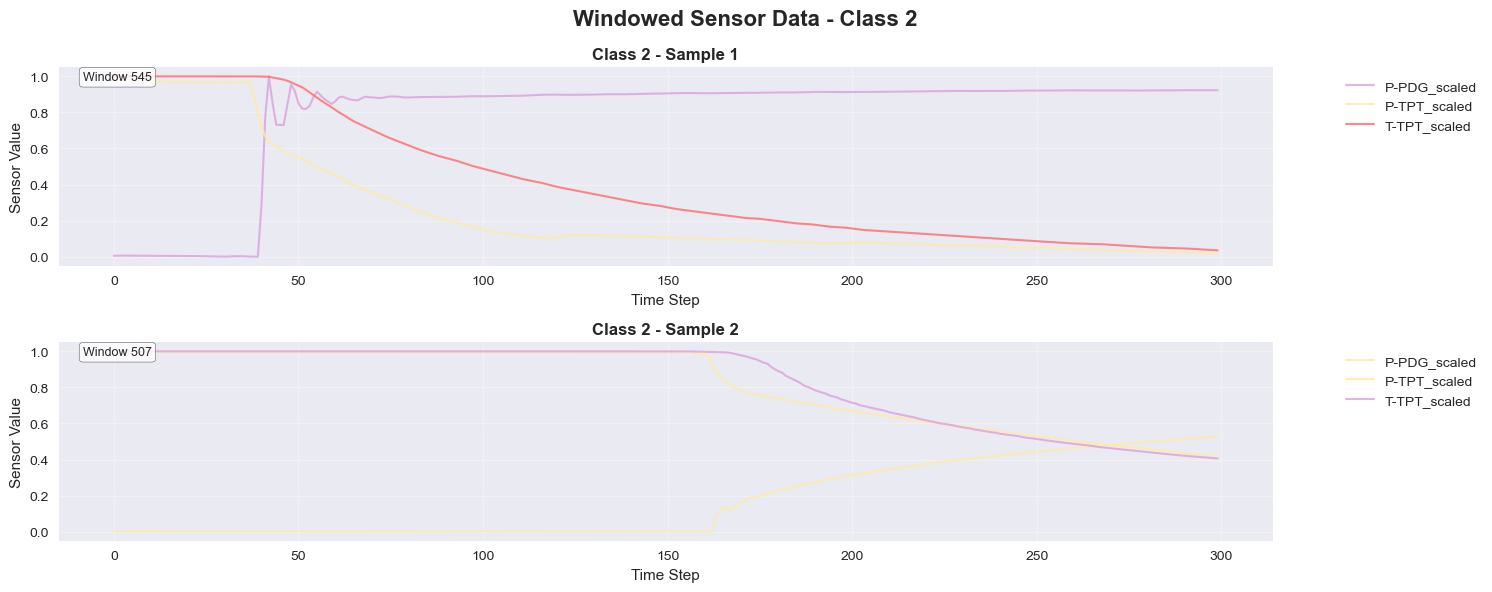

   ✅ Displayed 2 samples for class 2

🎯 Class 3:
   📊 Showing 2 samples (out of 242 available)


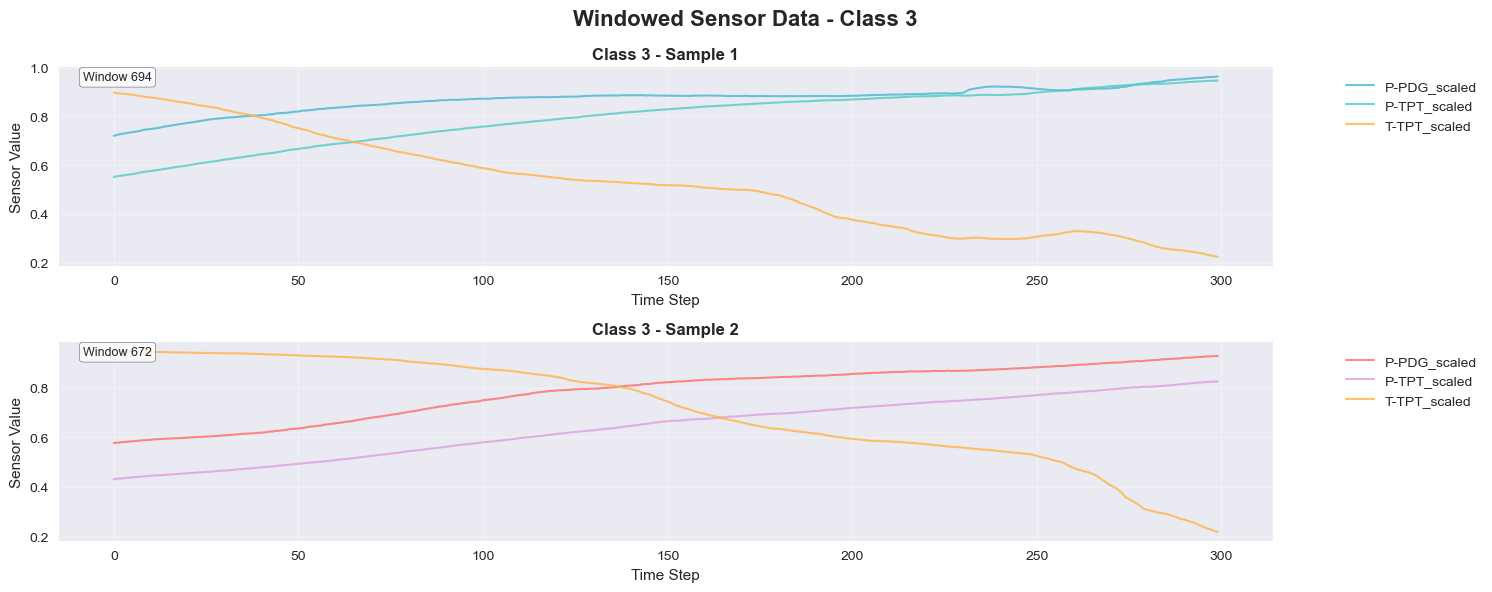

   ✅ Displayed 2 samples for class 3

🎯 Class 4:
   📊 Showing 2 samples (out of 136 available)


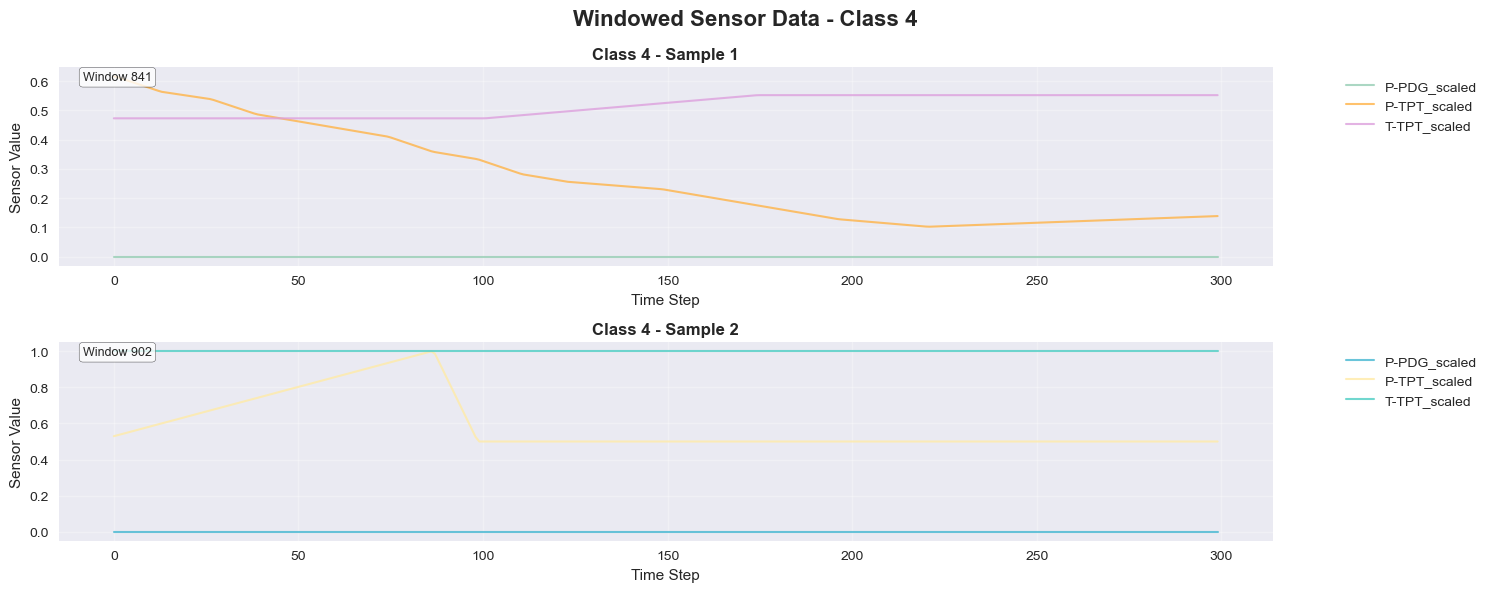

   ✅ Displayed 2 samples for class 4

🎯 Class 5:
   📊 Showing 2 samples (out of 59 available)


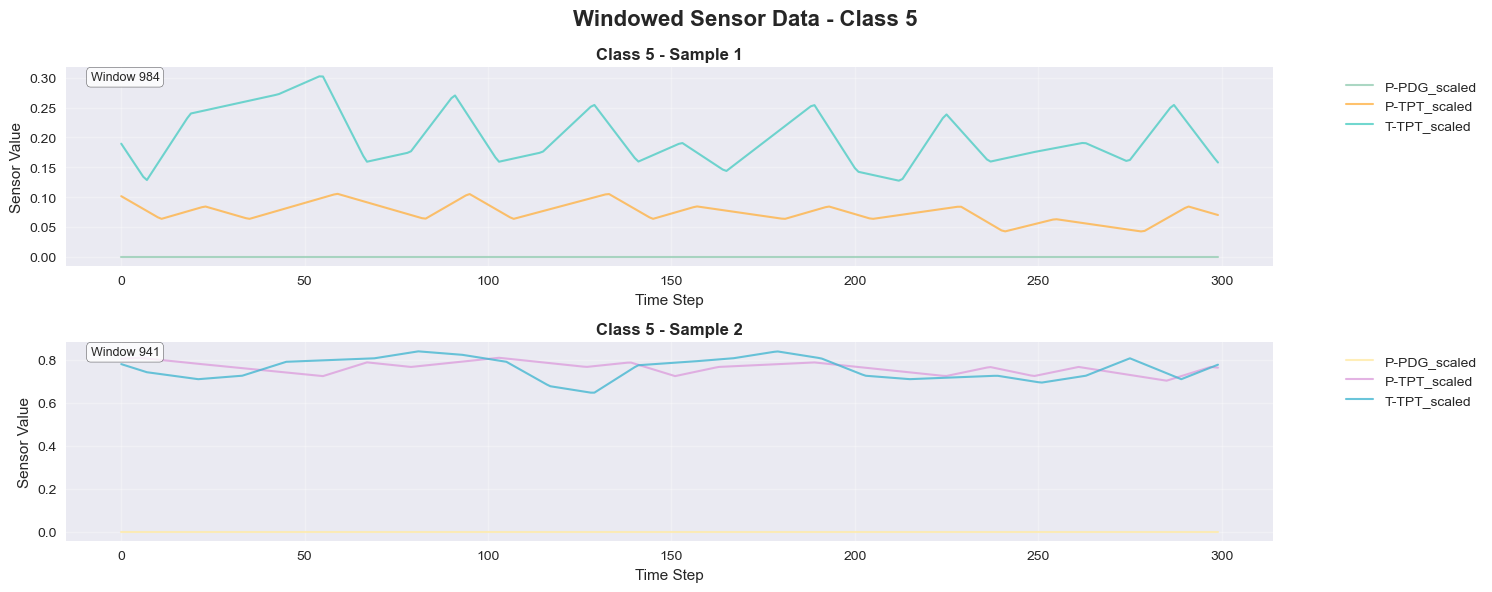

   ✅ Displayed 2 samples for class 5

🎯 Class 6:
   📊 Showing 2 samples (out of 10 available)


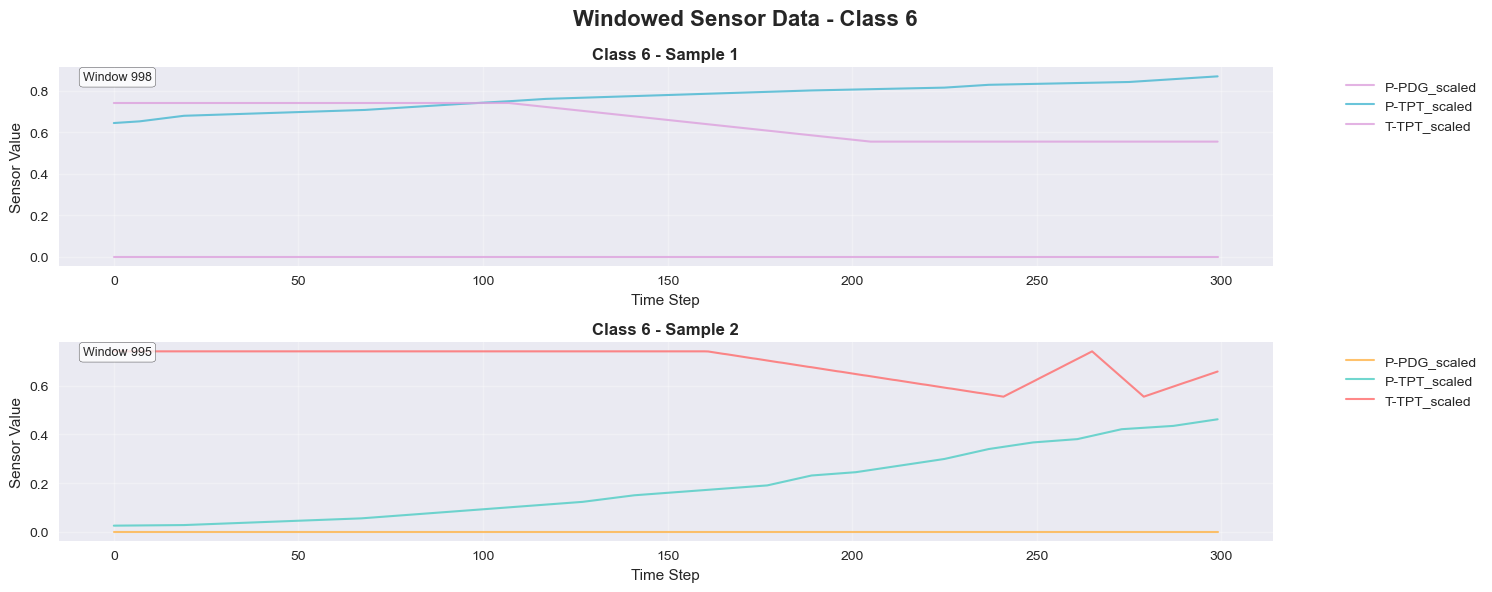

   ✅ Displayed 2 samples for class 6

🎯 Class 7:
   📊 Showing 2 samples (out of 2833 available)


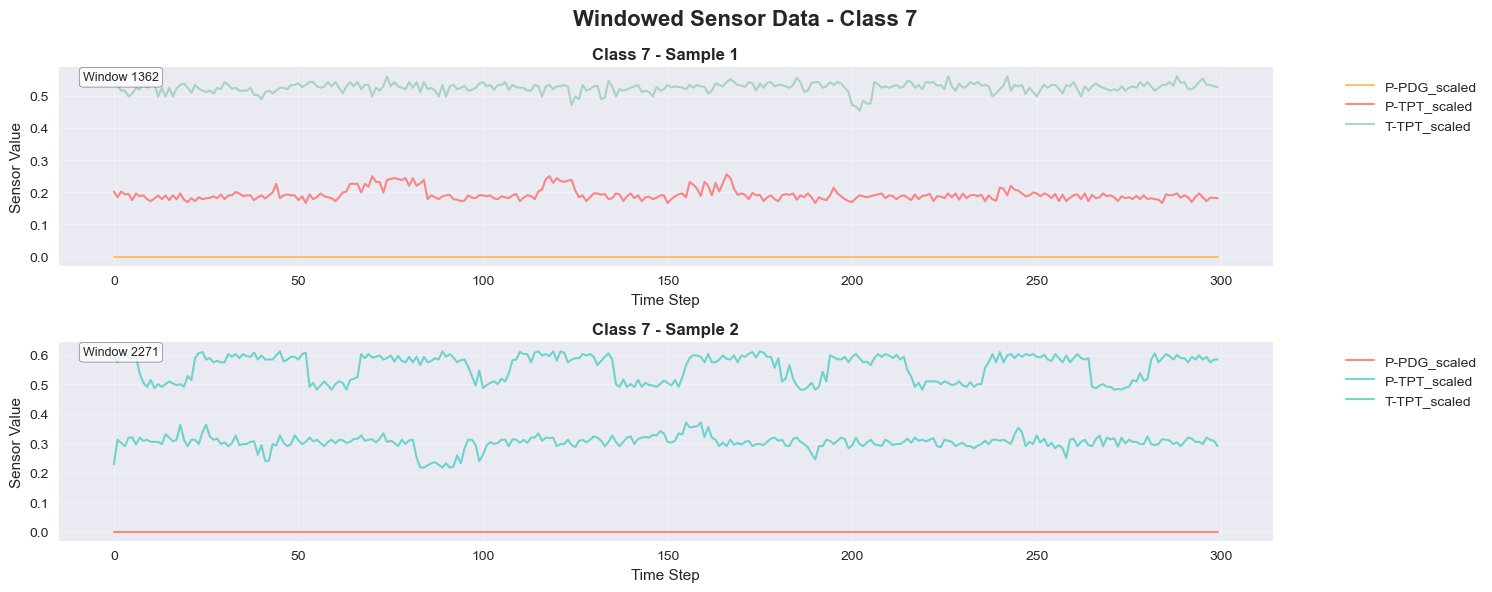

   ✅ Displayed 2 samples for class 7

🎯 Class 8:
   📊 Showing 2 samples (out of 295 available)


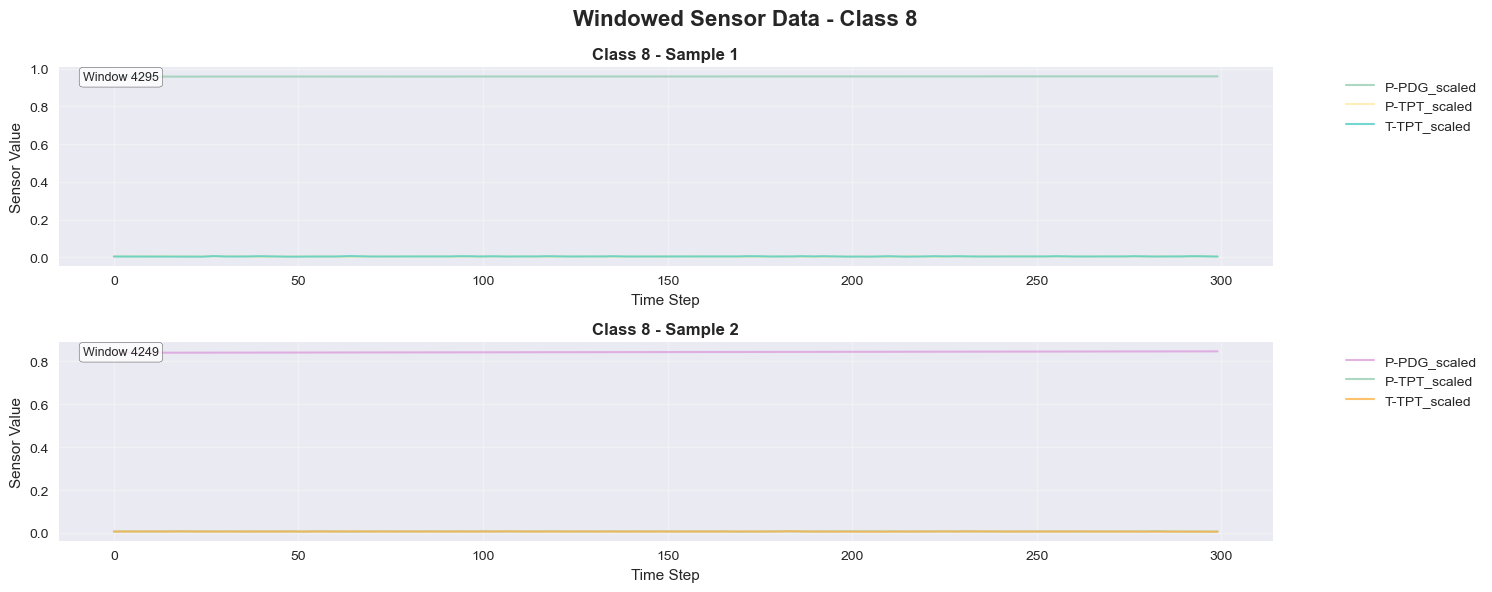

   ✅ Displayed 2 samples for class 8


In [3]:
# Complete Visualization: Sample Sensor Data for Each Class
if test_dfs is not None and "test_classes" in locals():
    print("🎨 Window Sensor Data Visualization")
    print("=" * 60)

    try:
        # Extract and map class labels first
        mapped_classes = dim_reducer.extract_and_map_classes(test_dfs, test_classes)

        # Set random seed for reproducible sampling
        np.random.seed(42)

        # Visualize complete samples for each class (5 samples per class)
        dim_reducer.visualize_window_samples(test_dfs, mapped_classes, samples_per_class=2)

    except Exception as e:
        print(f"❌ Complete visualization failed: {e}")
        import traceback

        traceback.print_exc()
else:
    print("❌ Cannot create complete visualizations: No test data available")
    print("Please ensure the data loading completed successfully")

## Data Preprocessing for Dimensionality Reduction

**Why preprocess for visualization?**
- **Feature standardization** - Ensure all sensors contribute equally
- **Sampling strategy** - Balance computational cost vs. detail
- **Format transformation** - Convert time windows to feature vectors

**Steps:**
1. **Flatten windows** - Convert 2D time series to 1D feature vectors
2. **Standardize features** - Zero mean, unit variance
3. **Intelligent sampling** - Balance classes while reducing dataset size

In [4]:
# Extract and Process Class Labels
if test_dfs is not None:
    try:
        # Extract and map class labels using existing methods
        mapped_classes = dim_reducer.extract_and_map_classes(test_dfs, test_classes)
        print("✅ Class processing complete")

    except Exception as e:
        print(f"❌ Class processing failed: {e}")
        mapped_classes = None

🏷️ Processing class labels...
🏷️ Original class distribution: {np.int16(0): np.int64(1142), np.int16(1): np.int64(2), np.int16(2): np.int64(3), np.int16(3): np.int64(242), np.int16(4): np.int64(136), np.int16(5): np.int64(1), np.int16(6): np.int64(7), np.int16(7): np.int64(7), np.int16(8): np.int64(23), np.int16(101): np.int64(52), np.int16(102): np.int64(20), np.int16(105): np.int64(58), np.int16(106): np.int64(3), np.int16(107): np.int64(2826), np.int16(108): np.int64(272)}
🔄 Mapped 3231 points with transient classes
🏷️ Mapped class distribution: {np.int64(0): np.int64(1142), np.int64(1): np.int64(54), np.int64(2): np.int64(23), np.int64(3): np.int64(242), np.int64(4): np.int64(136), np.int64(5): np.int64(59), np.int64(6): np.int64(10), np.int64(7): np.int64(2833), np.int64(8): np.int64(295)}
✅ Class processing complete


## Dimensionality Reduction Theory

**The challenge:** Time series windows create high-dimensional data (e.g., 100 timesteps × 5 sensors = 500 features)

**Dimensionality reduction goals:**
- **Visualization** - Project to 2D/3D for human interpretation
- **Pattern discovery** - Reveal hidden structures and clusters
- **Noise reduction** - Focus on most informative dimensions

**Method comparison:**
- **t-SNE** - Excellent for cluster visualization, preserves local neighborhoods
- **UMAP** - Faster, preserves both local and global structure, more deterministic
- **Parameter sensitivity** - Both require tuning for optimal results

**Applications:**
- **Class separability** - See if fault types form distinct clusters
- **Outlier detection** - Identify unusual samples
- **Feature importance** - Understand which sensor patterns matter most

In [5]:
# Intelligent Sampling and Feature Extraction
if mapped_classes is not None:
    try:
        # Perform intelligent sampling using existing methods
        selected_test_dfs, selected_classes, sampling_summary = (
            dim_reducer.intelligent_sampling_for_visualization(
                test_dfs, mapped_classes, config
            )
        )

        # Extract and standardize features
        X_scaled, y_labels, scaler = dim_reducer.prepare_features_for_visualization(
            selected_test_dfs, selected_classes
        )

        print(f"\n📈 Final Dataset Summary:")
        print(f"   • Samples: {X_scaled.shape[0]} (balanced)")
        print(f"   • Features: {X_scaled.shape[1]} (standardized)")
        print(f"   • Classes: {sorted(np.unique(y_labels))}")
        print(f"   • Memory: {X_scaled.nbytes / 1024 / 1024:.2f} MB")

        unique_classes = np.unique(y_labels)
        print("✅ Data preparation complete - ready for visualization!")

    except Exception as e:
        print(f"❌ Feature extraction failed: {e}")
        X_scaled, y_labels = None, None
        import traceback

        traceback.print_exc()
else:
    X_scaled, y_labels = None, None

🎯 Performing intelligent sampling...
   • Selected 400 windows
   • Sampling summary: {0: {'available': 1142, 'sampled': 100}, 3: {'available': 242, 'sampled': 100}, 4: {'available': 136, 'sampled': 100}, 8: {'available': 295, 'sampled': 100}}
🔄 Preparing features for visualization...
   • Features: 3 sensors × 300 timesteps
   • Feature matrix: (400, 900)
   • Memory usage: 2.75 MB

📈 Final Dataset Summary:
   • Samples: 400 (balanced)
   • Features: 900 (standardized)
   • Classes: [np.int64(0), np.int64(3), np.int64(4), np.int64(8)]
   • Memory: 2.75 MB
✅ Data preparation complete - ready for visualization!


## t-SNE Implementation

**t-SNE (t-Distributed Stochastic Neighbor Embedding):**
- **Local structure focus** - Preserves neighborhoods between similar points
- **Non-linear mapping** - Can reveal complex, curved decision boundaries
- **Perplexity parameter** - Controls local vs global emphasis (typical: 5-50)

**Strengths:**
- **Excellent clustering** - Clear separation of different classes
- **Intuitive results** - Often produces visually appealing clusters

**Limitations:**
- **Slow computation** - O(n²) complexity
- **Random initialization** - Results can vary between runs
- **Global structure loss** - May not preserve overall data relationships

🔮 t-SNE: Non-linear Dimensionality Reduction
🔮 Running t-SNE analysis...
   • t-SNE #1: perplexity=30, lr=200...


c:\Users\lucas\.conda\envs\3W-ml-mts\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


     ✅ Completed in 6.1s
   • t-SNE #2: perplexity=10, lr=100...
     ✅ Completed in 0.4s
   • t-SNE #3: perplexity=50, lr=300...
     ✅ Completed in 0.6s
   • t-SNE #4: perplexity=30, lr=500...
     ✅ Completed in 0.5s


c:\Users\lucas\Documents\GitHub\3W\resources\introduction_to_ml_applied_to_mts\src\visualization.py:1565: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\lucas\.conda\envs\3W-ml-mts\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


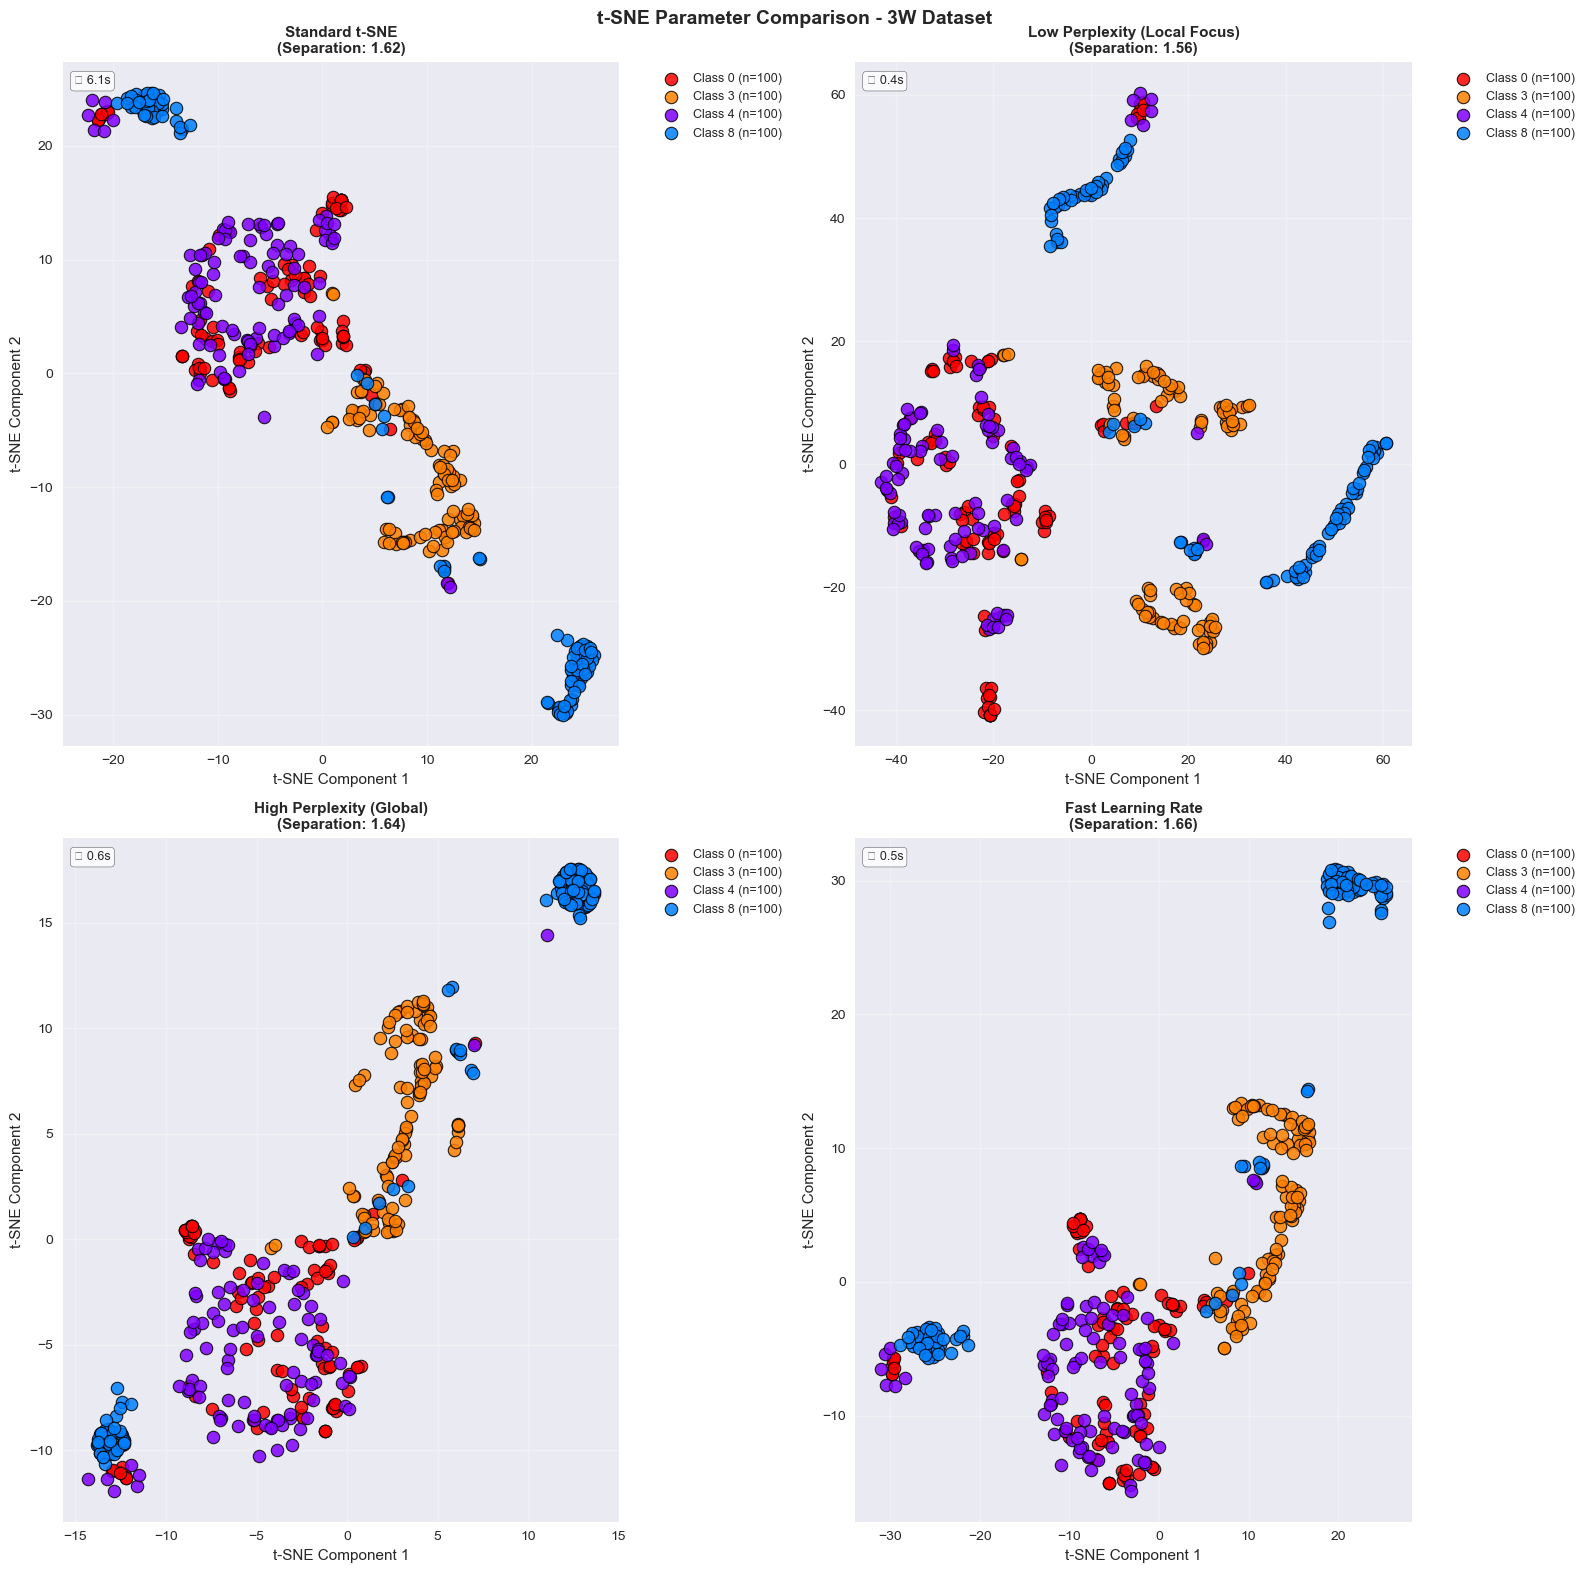


📊 t-SNE Analysis Results:
⚡ Configuration Performance:
   • Config 1: 6.1s
   • Config 2: 0.4s ⚡ Fastest
   • Config 3: 0.6s
   • Config 4: 0.5s


In [6]:
# t-SNE Visualization Analysis
if X_scaled is not None and y_labels is not None:
    print("🔮 t-SNE: Non-linear Dimensionality Reduction")
    print("=" * 60)

    # Run t-SNE analysis using existing methods
    tsne_results = dim_reducer.run_tsne_analysis(X_scaled, y_labels)

    # Create visualizations
    fig = dim_reducer.plot_dimensionality_reduction_results(
        tsne_results, y_labels, "t-SNE"
    )

    # Print performance summary
    dim_reducer.print_dimensionality_reduction_summary(tsne_results, "t-SNE")

else:
    print("❌ Cannot run t-SNE: No processed data available")
    print("Please ensure the data preparation completed successfully")

## Visualization Insights & Next Steps

**What we learned:**
- **Class separability** - How well different fault types can be distinguished
- **Data quality** - Identified outliers, noise, and potential mislabeling
- **Feature relevance** - Which sensor combinations are most informative
- **Algorithm suitability** - Whether linear or non-linear models are needed

**Actionable insights for ML:**
- **Well-separated clusters** → Simple classifiers (SVM, Random Forest) may work well
- **Complex boundaries** → Deep learning or ensemble methods needed
- **Overlapping classes** → Feature engineering or data augmentation required
- **Clear patterns** → Good prospects for accurate fault detection

**Next steps:**
- **Supervised learning** (notebook 3) - Build classification models
- **Unsupervised learning** (notebook 4) - Explore anomaly detection
- **Feature engineering** - Based on discovered patterns

# NEXT STEPS - UMAP

## UMAP Implementation

**UMAP (Uniform Manifold Approximation and Projection):**
- **Global + local structure** - Preserves both neighborhood and overall topology
- **Faster computation** - More scalable to large datasets
- **Deterministic** - Consistent results with same parameters

**Key parameters:**
- **n_neighbors** - Local neighborhood size (typical: 5-50)
- **min_dist** - Minimum distance between points in 2D space
- **metric** - Distance function (euclidean, cosine, etc.)

**Advantages:**
- **Speed** - Much faster than t-SNE for large datasets
- **Stability** - More consistent results across runs
- **Interpretability** - Better preserves global relationships

In [7]:
# Check UMAP Availability
try:
    import umap

    umap_available = True
    print("✅ UMAP library available")
except ImportError:
    umap_available = False
    print("❌ UMAP not available")
    print("📦 Install with: pip install umap-learn")
    print("🔄 Attempting installation...")

    try:
        import subprocess
        import sys

        subprocess.check_call(
            [sys.executable, "-m", "pip", "install", "umap-learn"],
            capture_output=True,
            text=True,
        )
        import umap

        umap_available = True
        print("✅ UMAP installed successfully")
    except Exception as e:
        print(f"❌ Installation failed: {e}")
        print("⚠️ Continuing without UMAP")

c:\Users\lucas\.conda\envs\3W-ml-mts\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ UMAP library available


🚀 UMAP: Uniform Manifold Approximation
🚀 Running UMAP analysis...
   • UMAP #1: neighbors=15, dist=0.1...


c:\Users\lucas\.conda\envs\3W-ml-mts\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


     ✅ Completed in 6.3s
   • UMAP #2: neighbors=5, dist=0.0...
     ✅ Completed in 0.2s
   • UMAP #3: neighbors=50, dist=0.5...


c:\Users\lucas\.conda\envs\3W-ml-mts\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\lucas\.conda\envs\3W-ml-mts\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


     ✅ Completed in 0.4s
   • UMAP #4: neighbors=30, dist=0.25...


c:\Users\lucas\.conda\envs\3W-ml-mts\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


     ✅ Completed in 0.3s


c:\Users\lucas\Documents\GitHub\3W\resources\introduction_to_ml_applied_to_mts\src\visualization.py:1565: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\lucas\.conda\envs\3W-ml-mts\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


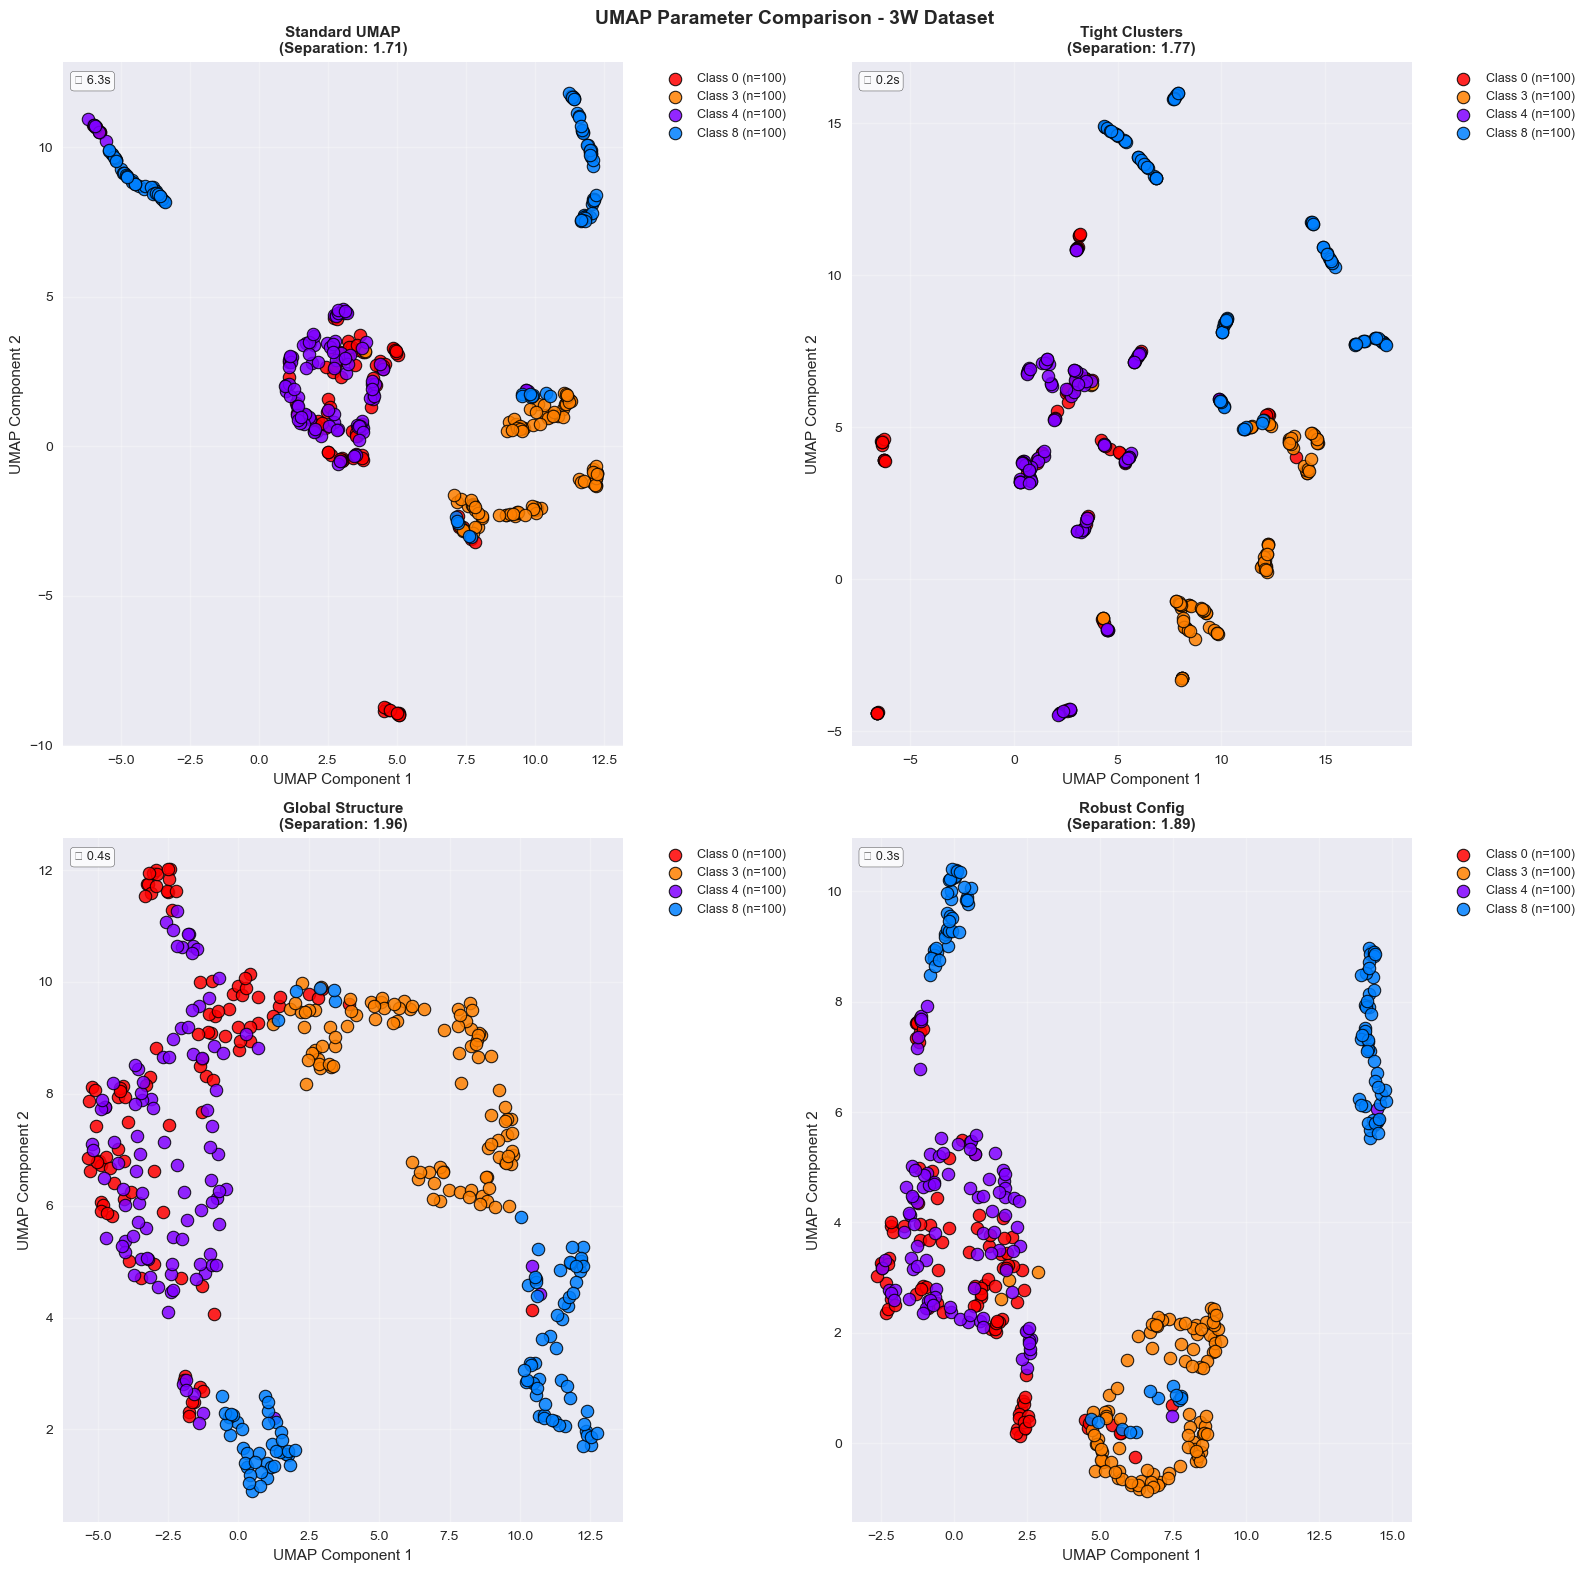


📊 UMAP Analysis Results:
⚡ Configuration Performance:
   • Config 1: 6.3s
   • Config 2: 0.2s ⚡ Fastest
   • Config 3: 0.4s
   • Config 4: 0.3s


In [8]:
# UMAP Visualization Analysis
if X_scaled is not None and y_labels is not None and umap_available:
    print("🚀 UMAP: Uniform Manifold Approximation")
    print("=" * 60)

    # Run UMAP analysis using existing methods
    umap_results = dim_reducer.run_umap_analysis(X_scaled, y_labels)

    if umap_results:
        # Create visualizations
        fig = dim_reducer.plot_dimensionality_reduction_results(
            umap_results, y_labels, "UMAP"
        )

        # Print performance summary
        dim_reducer.print_dimensionality_reduction_summary(umap_results, "UMAP")

elif not umap_available:
    print("❌ UMAP not available. Skipping UMAP analysis.")
else:
    print("❌ Cannot run UMAP: No processed data available")

## Method Comparison Analysis

**Choosing the right method:**

**Use t-SNE when:**
- **Small-medium datasets** (<10k samples)
- **Focus on clustering** - Want clear class separation
- **Exploratory analysis** - Looking for hidden patterns
- **Computational time not critical**

**Use UMAP when:**
- **Large datasets** (>10k samples)
- **Global structure matters** - Need to preserve overall relationships
- **Reproducibility required** - Consistent results needed
- **Speed is important** - Production visualization systems

**Interpretation guidelines:**
- **Tight clusters** - Strong class separability, good for classification
- **Overlapping regions** - Challenging classification boundaries
- **Outliers** - Potential data quality issues or rare patterns

In [9]:
# Method Comparison and Analysis
print("📊 Dimensionality Reduction Method Comparison")
print("=" * 60)

# Compare methods if both are available
if "tsne_results" in locals() and "umap_results" in locals():
    print("🏆 t-SNE vs UMAP Performance Comparison:")

    # Calculate average times
    tsne_times = [r["time"] for r in tsne_results if r["time"] is not None]
    umap_times = (
        [r["time"] for r in umap_results if r["time"] is not None]
        if umap_results
        else []
    )

    if tsne_times:
        avg_tsne_time = np.mean(tsne_times)
        print(f"   • t-SNE average time: {avg_tsne_time:.1f}s")

    if umap_times:
        avg_umap_time = np.mean(umap_times)
        print(f"   • UMAP average time: {avg_umap_time:.1f}s")

        if tsne_times:
            speedup = avg_tsne_time / avg_umap_time
            print(f"   • UMAP speedup: {speedup:.1f}x faster")

    print(f"\n📈 Method Characteristics:")
    print(f"   🔮 t-SNE:")
    print(f"      • Excellent for local structure preservation")
    print(f"      • Great for cluster visualization")
    print(f"      • Sensitive to perplexity parameter")
    print(f"      • Computationally intensive")

    if umap_available:
        print(f"   🚀 UMAP:")
        print(f"      • Preserves both local and global structure")
        print(f"      • Faster computation")
        print(f"      • More scalable to large datasets")
        print(f"      • Deterministic results")

print(f"\n✅ Visualization analysis complete!")
print(f"📝 Key insights:")
print(f"   • Both methods revealed class separability patterns")
print(f"   • Parameter tuning affects cluster quality")
print(f"   • Different metrics capture different data aspects")

📊 Dimensionality Reduction Method Comparison
🏆 t-SNE vs UMAP Performance Comparison:
   • t-SNE average time: 1.9s
   • UMAP average time: 1.8s
   • UMAP speedup: 1.1x faster

📈 Method Characteristics:
   🔮 t-SNE:
      • Excellent for local structure preservation
      • Great for cluster visualization
      • Sensitive to perplexity parameter
      • Computationally intensive
   🚀 UMAP:
      • Preserves both local and global structure
      • Faster computation
      • More scalable to large datasets
      • Deterministic results

✅ Visualization analysis complete!
📝 Key insights:
   • Both methods revealed class separability patterns
   • Parameter tuning affects cluster quality
   • Different metrics capture different data aspects


In [10]:
# Summary
print("🎯 Visualization Analysis Summary")
print("=" * 60)

if "X_scaled" in locals() and X_scaled is not None:
    print(f"✅ Successfully analyzed {X_scaled.shape[0]} windowed time series samples")
    print(f"✅ Reduced dimensionality from {X_scaled.shape[1]} to 2D")
    print(f"✅ Visualized {len(np.unique(y_labels))} fault classes")

    # Dataset summary
    print(f"\n📊 Dataset Summary:")
    for class_label in sorted(np.unique(y_labels)):
        count = np.sum(y_labels == class_label)
        percentage = count / len(y_labels) * 100
        print(f"   • Class {class_label}: {count} samples ({percentage:.1f}%)")

    # Available variables
    print(f"\n💾 Available Variables:")
    print(f"   • X_scaled: Standardized feature matrix ({X_scaled.shape})")
    print(f"   • y_labels: Class labels ({len(y_labels)} samples)")
    if "tsne_results" in locals():
        print(f"   • tsne_results: t-SNE analysis results")
    if "umap_results" in locals() and umap_results:
        print(f"   • umap_results: UMAP analysis results")


else:
    print("❌ Analysis incomplete - no processed data available")
    print("🔧 Please run previous cells to generate data")

🎯 Visualization Analysis Summary
✅ Successfully analyzed 400 windowed time series samples
✅ Reduced dimensionality from 900 to 2D
✅ Visualized 4 fault classes

📊 Dataset Summary:
   • Class 0: 100 samples (25.0%)
   • Class 3: 100 samples (25.0%)
   • Class 4: 100 samples (25.0%)
   • Class 8: 100 samples (25.0%)

💾 Available Variables:
   • X_scaled: Standardized feature matrix ((400, 900))
   • y_labels: Class labels (400 samples)
   • tsne_results: t-SNE analysis results
   • umap_results: UMAP analysis results
